<font color='red'>Problem statement:</font> To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

Importing Skin Cancer Data To do: Take necessary actions to read the data Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir_train = pathlib.Path("CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
temp_train_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=1
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
len(list(temp_train_ds.as_numpy_iterator()))

1792

In [8]:
len(list(train_ds.as_numpy_iterator()))

56

In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
len(list(val_ds.as_numpy_iterator()))*32

448

In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset|

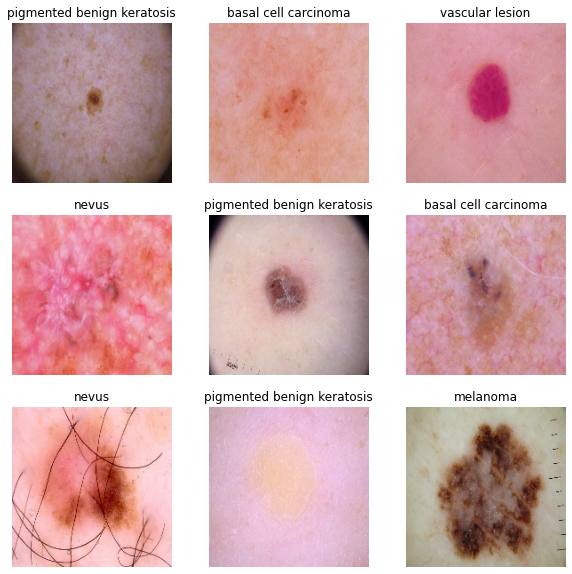

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create the model

*Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1] *

In [14]:
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

# Compile the model

Choose an appropirate optimiser and loss function for model training

<font color='blue'>Since we are doing multi classification problem, let us use SparseCategoricalCrossEntropy with adam optimizer</font>

In [15]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Train the Model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 47s 669ms/step - loss: 1.9563 - accuracy: 0.2550 - val_loss: 1.7496 - val_accuracy: 0.3870
Epoch 2/20
56/56 [==============================] - 26s 468ms/step - loss: 1.7167 - accuracy: 0.3717 - val_loss: 1.5983 - val_accuracy: 0.4430
Epoch 3/20
56/56 [==============================] - 23s 408ms/step - loss: 1.4945 - accuracy: 0.4688 - val_loss: 1.4729 - val_accuracy: 0.5168
Epoch 4/20
56/56 [==============================] - 25s 454ms/step - loss: 1.4736 - accuracy: 0.4682 - val_loss: 1.4320 - val_accuracy: 0.5168
Epoch 5/20
56/56 [==============================] - 25s 448ms/step - loss: 1.3252 - accuracy: 0.5307 - val_loss: 1.4065 - val_accuracy: 0.5190
Epoch 6/20
56/56 [==============================] - 26s 456ms/step - loss: 1.2624 - accuracy: 0.5525 - val_loss: 1.4818 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 26s 474ms/step - loss: 1.2057 - accuracy: 0.5854 - val_loss: 1.4224 - val_accuracy: 0.4832

# Visualizing training results

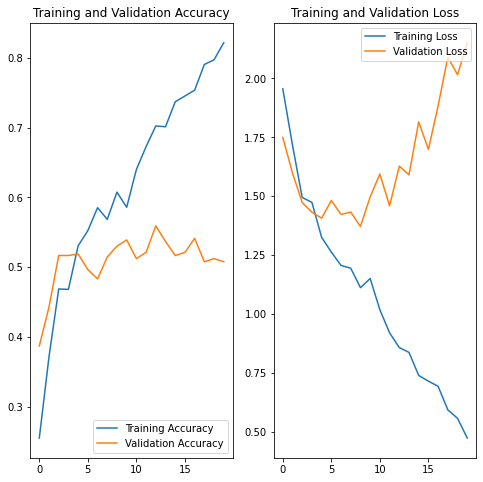

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

<font color='blue'>From above plot we can see training accuracy is very high compared to validation accuracy. Hence this is an <b>overfit model</b></font>

# Augmentation Layer

In [18]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
])

Original Image

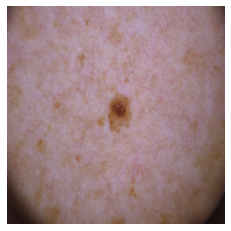

In [19]:
plt.axis('off')
plt.imshow(images[0].numpy().astype("uint8"))

Image with Augmentation

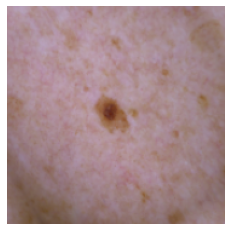

In [20]:
plt.axis('off')
plt.imshow(data_augmentation(images)[0].numpy().astype("uint8"))

# Remodel using Augmentation Layer

In [21]:
num_classes = 9

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 29s 504ms/step - loss: 2.0238 - accuracy: 0.2338 - val_loss: 1.8594 - val_accuracy: 0.3154
Epoch 2/20
56/56 [==============================] - 29s 514ms/step - loss: 1.7618 - accuracy: 0.3728 - val_loss: 1.6187 - val_accuracy: 0.4474
Epoch 3/20
56/56 [==============================] - 29s 512ms/step - loss: 1.5676 - accuracy: 0.4492 - val_loss: 1.4975 - val_accuracy: 0.4743
Epoch 4/20
56/56 [==============================] - 29s 514ms/step - loss: 1.4620 - accuracy: 0.4939 - val_loss: 1.4130 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 28s 508ms/step - loss: 1.4151 - accuracy: 0.4933 - val_loss: 1.4550 - val_accuracy: 0.4944
Epoch 6/20
56/56 [==============================] - 29s 514ms/step - loss: 1.4176 - accuracy: 0.5039 - val_loss: 1.4955 - val_accuracy: 0.4519
Epoch 7/20
56/56 [==============================] - 29s 514ms/step - loss: 1.3441 - accuracy: 0.5218 - val_loss: 1.3647 - val_accuracy: 0.5257

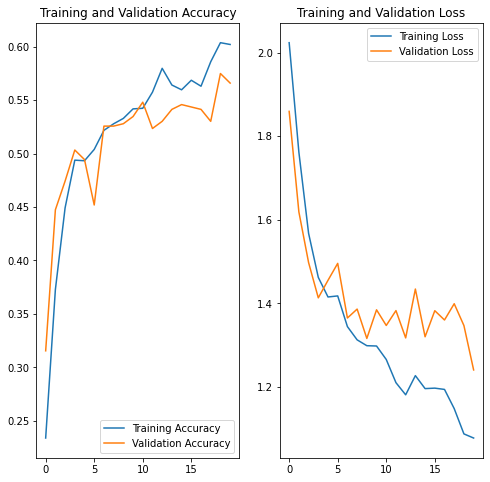

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

<font color='blue'><b>Ans:</b> We can see overfit is resolved and there is a slight increase in validation accuracy from 51% to 57%. <br>However, training accuracy is also reduced to 60% and hence this is an <b>underfit model</b></font>


<b>Todo: Find the distribution of classes in the training dataset.</b>

Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
class_dict = {}


for images, labels in train_ds:
  for i in range(32):
    class_name = class_names[labels[i]]
    if class_name in class_dict:
      class_dict[class_name] += 1
    else:
      class_dict[class_name] = 1

print(class_dict)
    

{'basal cell carcinoma': 309, 'squamous cell carcinoma': 142, 'melanoma': 352, 'seborrheic keratosis': 58, 'dermatofibroma': 77, 'pigmented benign keratosis': 370, 'vascular lesion': 115, 'nevus': 277, 'actinic keratosis': 92}


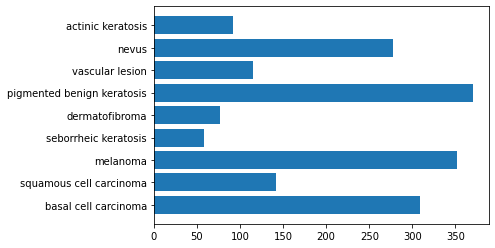

In [24]:
import matplotlib.pyplot as plt

names = list(class_dict.keys())
values = list(class_dict.values())

#tick_label does the some work as plt.xticks()
plt.barh(range(len(class_dict)),values,tick_label=names)
plt.savefig('bar.png')
plt.show()

<b>Which class has the least number of samples?</b>

<font color='blue'><b>Ans:</b> seborrheic keratosis has the least number of samples</font>


In [25]:
total_samples = sum(class_dict.values())
class_proportion = {}
for key, val in class_dict.items():
    class_proportion[key] = val / total_samples

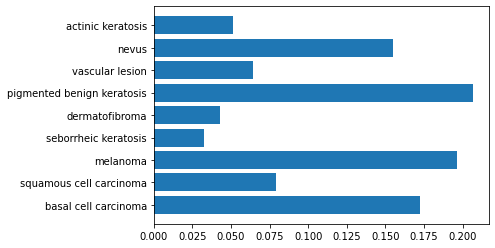

In [26]:
import matplotlib.pyplot as plt

names = list(class_proportion.keys())
values = list(class_proportion.values())

#tick_label does the some work as plt.xticks()
plt.barh(range(len(class_proportion)),values,tick_label=names)
plt.savefig('bar_prop.png')
plt.show()

<b>Which classes dominate the data in terms of the proportionate number of samples?</b>

<font color='blue'><b>Ans:</b> melanoma and pigmented benign keratosis dominate the data as they are high compared to others</font>

# Using Augmentor library

In [27]:
data_dir_train_aug = pathlib.Path("CNN_assignment_Aug/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [28]:
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [29]:
import Augmentor

for class_name in class_names:
    p = Augmentor.Pipeline(pathlib.Path.joinpath(data_dir_train_aug,class_name))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000)

Initialised with 114 image(s) found.
Output directory set to CNN_assignment_Aug\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FCA84B47C0>: 100%|█| 1000/1000 [00:08<00:00, 116.99 Sampl


Initialised with 376 image(s) found.
Output directory set to CNN_assignment_Aug\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FC9CAF68F0>: 100%|█| 1000/1000 [00:08<0


Initialised with 95 image(s) found.
Output directory set to CNN_assignment_Aug\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FCA84722F0>: 100%|█| 1000/1000 [00:09<00:00, 109.18 Sampl


Initialised with 438 image(s) found.
Output directory set to CNN_assignment_Aug\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1FC9CB02EF0>: 100%|█| 1000/1000 [00:41<00:00, 24.21 Sampl


Initialised with 357 image(s) found.
Output directory set to CNN_assignment_Aug\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x1FCF4564250>: 100%|█| 1000/1000 [00:39


Initialised with 462 image(s) found.
Output directory set to CNN_assignment_Aug\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FC811F3F70>: 100%|█| 1000/1000 [00:09<00:00, 107.53 Sampl


Initialised with 77 image(s) found.
Output directory set to CNN_assignment_Aug\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1FC85C178E0>: 100%|█| 1000/1000 [00:20<


Initialised with 181 image(s) found.
Output directory set to CNN_assignment_Aug\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FC85C55990>: 100%|█| 1000/1000 [00:09<00:00, 110.17 Sampl


Initialised with 139 image(s) found.
Output directory set to CNN_assignment_Aug\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FC83845CC0>: 100%|█| 1000/1000 [00:08<00:00, 116.04 Sampl


In [30]:
batch_size = 32
img_height = 180
img_width = 180
train_ds_aug =  tf.keras.preprocessing.image_dataset_from_directory(
    pathlib.Path.joinpath(data_dir_train_aug),
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [31]:

val_ds_aug =  tf.keras.preprocessing.image_dataset_from_directory(
    pathlib.Path.joinpath(data_dir_train_aug),
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


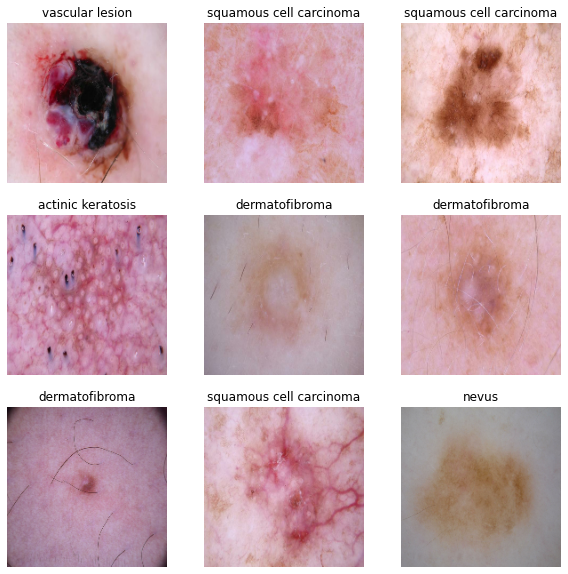

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds_aug.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [33]:
class_dict_aug = {}


for images, labels in train_ds_aug:
  for i in range(32):
    class_name = class_names[labels[i]]
    if class_name in class_dict_aug:
      class_dict_aug[class_name] += 1
    else:
      class_dict_aug[class_name] = 1

print(class_dict_aug)

{'pigmented benign keratosis': 1163, 'dermatofibroma': 870, 'actinic keratosis': 907, 'seborrheic keratosis': 867, 'basal cell carcinoma': 1086, 'nevus': 1104, 'vascular lesion': 900, 'squamous cell carcinoma': 945, 'melanoma': 1150}


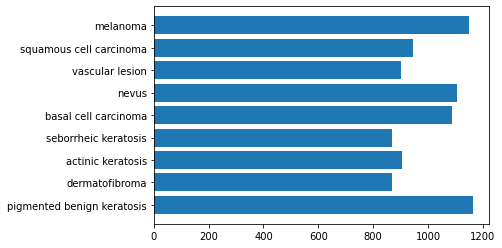

In [34]:
import matplotlib.pyplot as plt

names = list(class_dict_aug.keys())
values = list(class_dict_aug.values())

#tick_label does the some work as plt.xticks()
plt.barh(range(len(class_dict_aug)),values,tick_label=names)
plt.savefig('bar.png')
plt.show()

In [35]:
total_samples = sum(class_dict_aug.values())
class_proportion_aug = {}
for key, val in class_dict_aug.items():
    class_proportion_aug[key] = val / total_samples

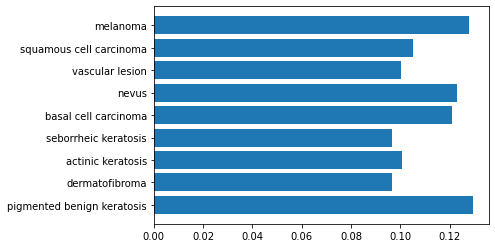

In [36]:
import matplotlib.pyplot as plt

names = list(class_proportion_aug.keys())
values = list(class_proportion_aug.values())

#tick_label does the some work as plt.xticks()
plt.barh(range(len(class_proportion_aug)),values,tick_label=names)
plt.savefig('bar_prop.png')
plt.show()

In [37]:
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

epochs = 30
history = model.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/30
281/281 [==============================] - 157s 554ms/step - loss: 1.7450 - accuracy: 0.3201 - val_loss: 1.4709 - val_accuracy: 0.4255
Epoch 2/30
281/281 [==============================] - 157s 558ms/step - loss: 1.3555 - accuracy: 0.4919 - val_loss: 1.2807 - val_accuracy: 0.5202
Epoch 3/30
281/281 [==============================] - 157s 557ms/step - loss: 1.1074 - accuracy: 0.5917 - val_loss: 1.0100 - val_accuracy: 0.6217
Epoch 4/30
281/281 [==============================] - 159s 565ms/step - loss: 0.8815 - accuracy: 0.6802 - val_loss: 0.9101 - val_accuracy: 0.6796
Epoch 5/30
281/281 [==============================] - 159s 565ms/step - loss: 0.6933 - accuracy: 0.7531 - val_loss: 0.6819 - val_accuracy: 0.7788
Epoch 6/30
281/281 [==============================] - 159s 566ms/step - loss: 0.5236 - accuracy: 0.8188 - val_loss: 0.7565 - val_accuracy: 0.7592
Epoch 7/30
281/281 [==============================] - 158s 561ms/step - loss: 0.4412 - accuracy: 0.8438 - val_loss: 0.6407 -

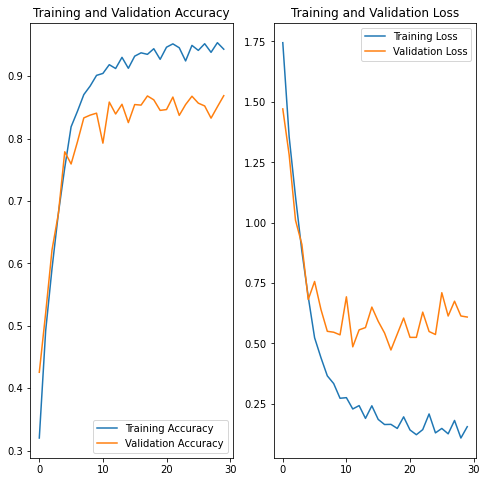

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<b>Findings with model using Augmentor library:</b>
    
<font color='blue'>
    Model is now a <b>good fit</b> as training accuracy and validation accuracy are closer to each other<br>
Performance is also good as we are getting 87% accuracy with validation data
</font>